Found 16504 images belonging to 15 classes.
Found 2064 images belonging to 15 classes.
Found 2070 images belonging to 15 classes.


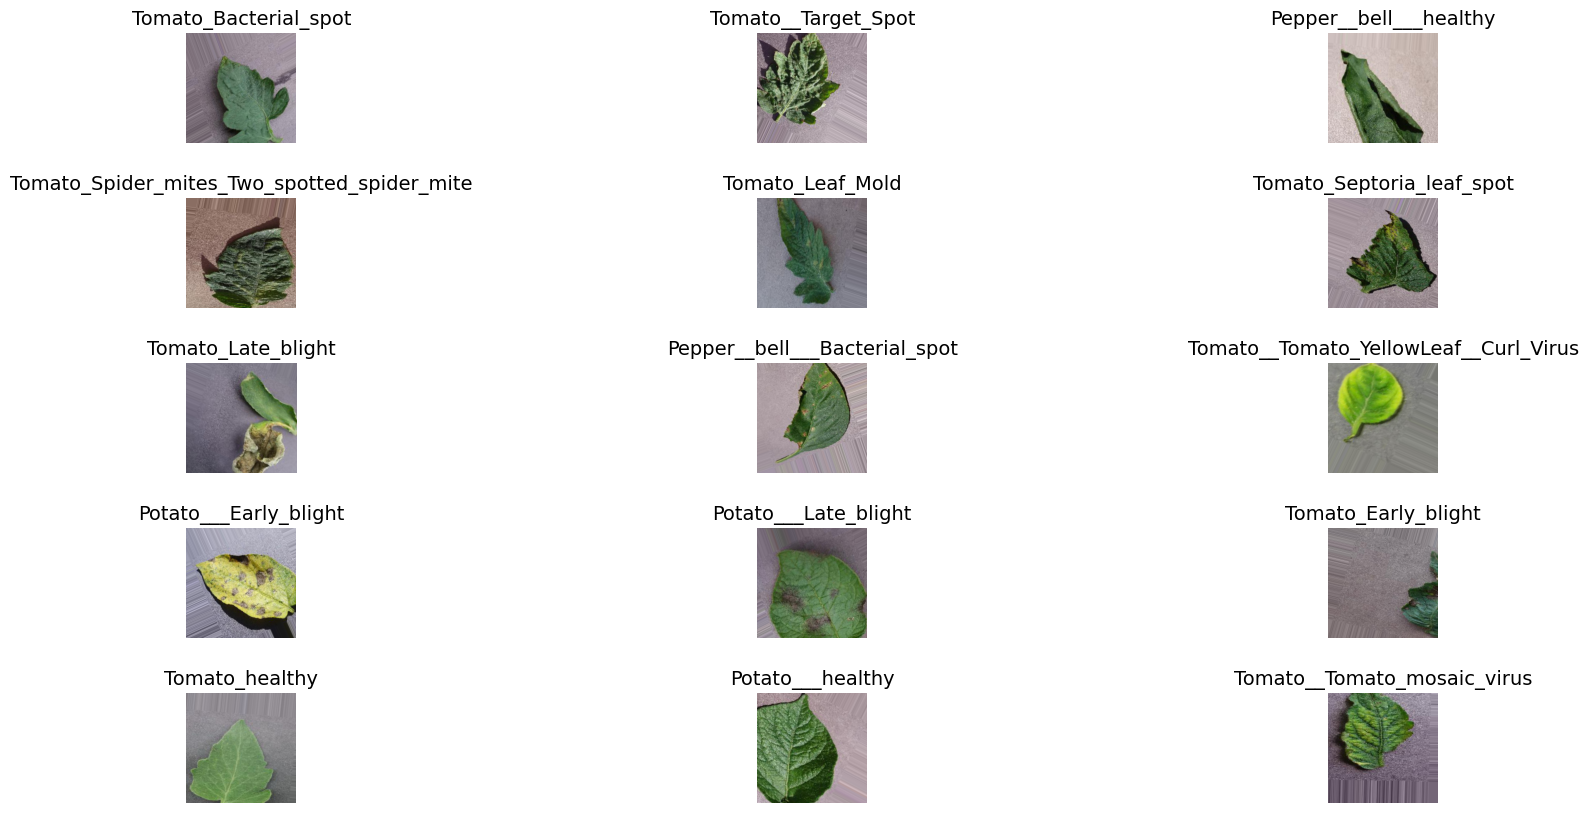

In [15]:
from tensorflow.keras.applications import Xception
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import label_binarize
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_curve, auc

%run DataPre.ipynb


In [16]:
input_shape = (224, 224, 3)  # Image size
num_classes = 15 #len(train_generator.class_indices)  # Number of classes in your dataset



# Load Xception model pre-trained on ImageNet
def build_xception(input_shape, num_classes):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=input_shape)
    
    # Freeze the layers of the base model
    for layer in base_model.layers:
        layer.trainable = False
    
    # Add custom top layers
    x = base_model.output
    x = GlobalAveragePooling2D()(x)
    x = Dropout(0.5)(x)
    x = Dense(512, activation='relu')(x)
    predictions = Dense(num_classes, activation='softmax')(x)

    # Construct the model
    model = Model(inputs=base_model.input, outputs=predictions)
    
    return model

# Build and compile the Xception model

model_xception = build_xception(input_shape, num_classes)

In [17]:
# Compile the model
model_xception.compile(optimizer=Adam(learning_rate=0.0001),
                       loss='categorical_crossentropy',
                       metrics=['accuracy'])

In [18]:
# Define EarlyStopping callback
early_stopping = EarlyStopping(
    monitor='val_loss',  
    patience=3,          
    restore_best_weights=True  
)

In [19]:
# Summary of the model
# model_xception.summary()

In [20]:
# Train the model
history_xception = model_xception.fit(
    train_generator,
    validation_data=val_generator,
    epochs=50,
    callbacks=[early_stopping]
)

Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 929s 2s/step - accuracy: 0.4071 - loss: 1.9210 - val_accuracy: 0.7306 - val_loss: 0.9171
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 905s 2s/step - accuracy: 0.6793 - loss: 0.9943 - val_accuracy: 0.7723 - val_loss: 0.7416
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 905s 2s/step - accuracy: 0.7219 - loss: 0.8402 - val_accuracy: 0.7888 - val_loss: 0.6589
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 913s 2s/step - accuracy: 0.7483 - loss: 0.7681 - val_accuracy: 0.8086 - val_loss: 0.6261
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 897s 2s/step - accuracy: 0.7513 - loss: 0.7497 - val_accuracy: 0.8169 - val_loss: 0.5733
Epoch 6/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 896s 2s/step - accuracy: 0.7600 - loss: 0.7244 - val_accuracy: 0.8154 - val_loss: 0.5660
Epoch 7/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 895s 2s/step - accuracy: 0.7698 - loss: 0.6962 - val_accuracy: 0.8188 - val_loss: 0.5510
Epoch 8/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 909s 2s/step - accuracy: 0.7694 - loss: 0.6913 - val_accu

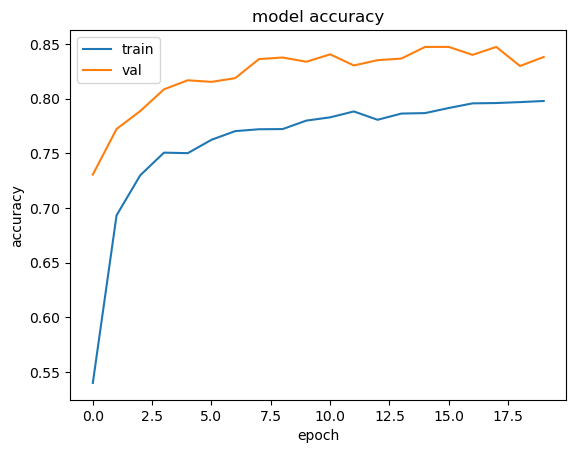

In [21]:
plt.plot(history_xception.history['accuracy'])
plt.plot(history_xception.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

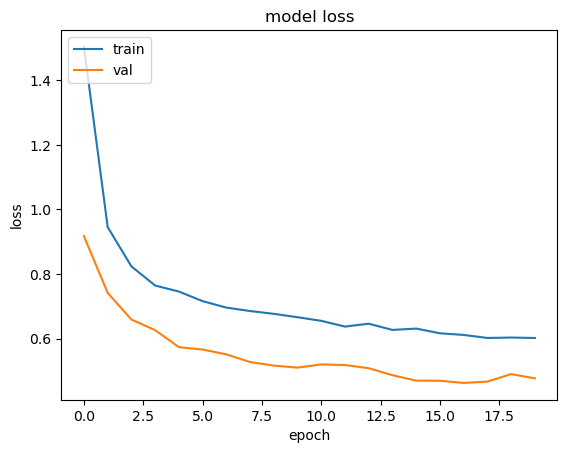

In [22]:
plt.plot(history_xception.history['loss'])
plt.plot(history_xception.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [23]:
# Save the model
model_xception.save('xception_plantvillage.keras')

In [24]:
# Evaluate the model on the test set
test_loss_xception, test_acc_xception = model_xception.evaluate(test_generator)
print(f"Test Accuracy for Xception: {test_acc_xception:.2f}")

65/65 ━━━━━━━━━━━━━━━━━━━━ 114s 2s/step - accuracy: 0.8645 - loss: 0.4032
Test Accuracy for Xception: 0.83


65/65 ━━━━━━━━━━━━━━━━━━━━ 112s 2s/step


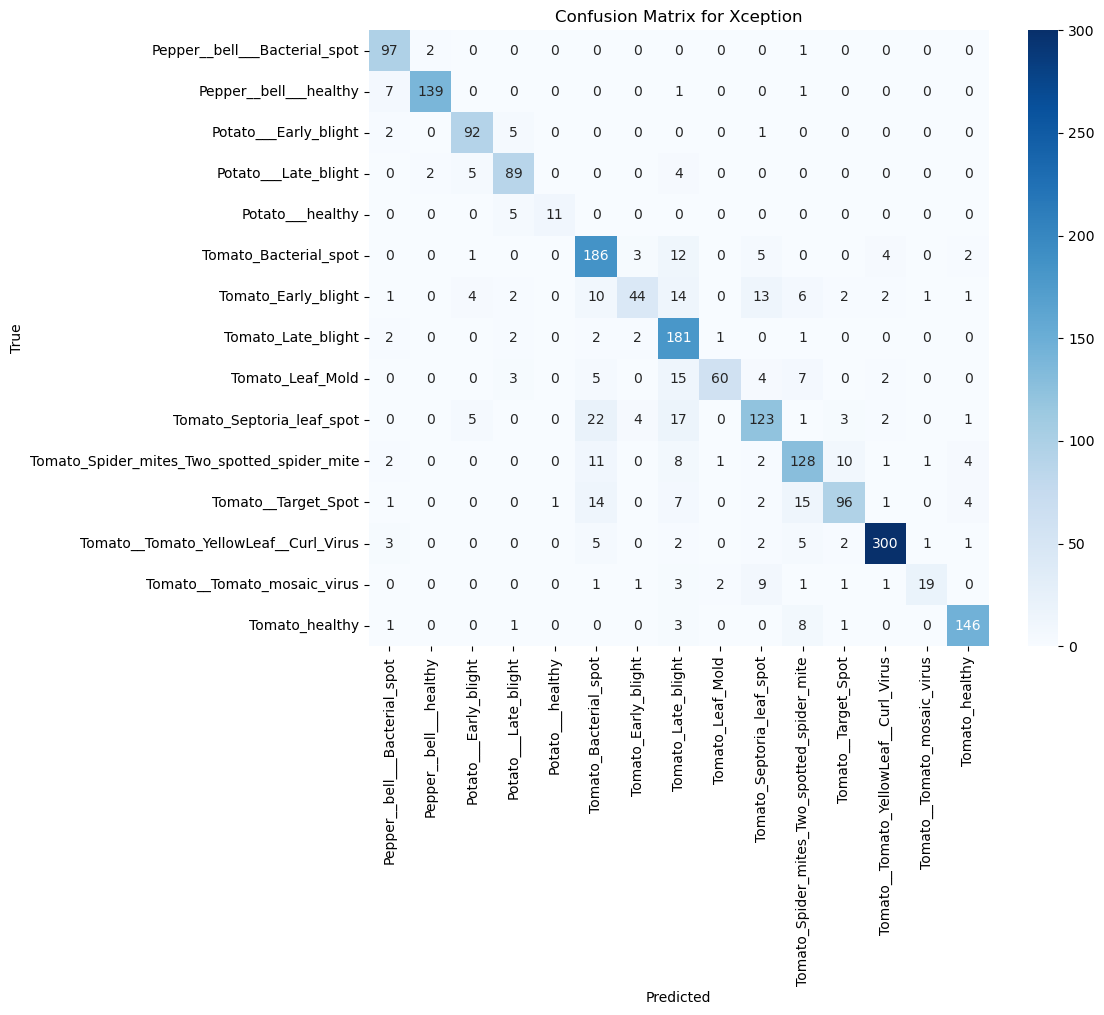

Classification Report for Xception:
                                              precision    recall  f1-score   support

              Pepper__bell___Bacterial_spot       0.84      0.97      0.90       100
                     Pepper__bell___healthy       0.97      0.94      0.96       148
                      Potato___Early_blight       0.86      0.92      0.89       100
                       Potato___Late_blight       0.83      0.89      0.86       100
                           Potato___healthy       0.92      0.69      0.79        16
                      Tomato_Bacterial_spot       0.73      0.87      0.79       213
                        Tomato_Early_blight       0.81      0.44      0.57       100
                         Tomato_Late_blight       0.68      0.95      0.79       191
                           Tomato_Leaf_Mold       0.94      0.62      0.75        96
                  Tomato_Septoria_leaf_spot       0.76      0.69      0.73       178
Tomato_Spider_mites_Two_spo

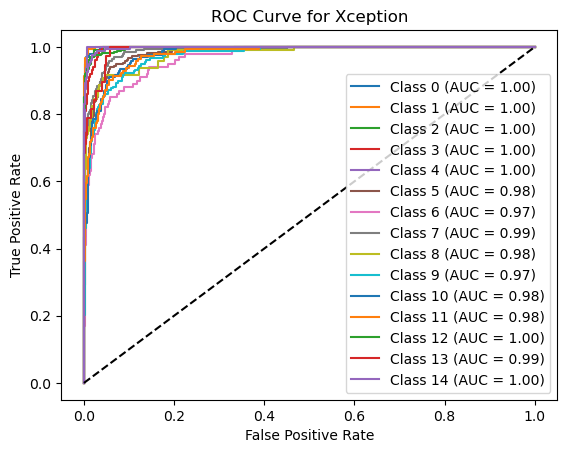

In [25]:

y_true = test_generator.classes 

# Predict on the test data
predictions_xception = model_xception.predict(test_generator)
y_pred_xception = np.argmax(predictions_xception, axis=1)  

# Confusion Matrix
conf_matrix_xception = confusion_matrix(y_true, y_pred_xception)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_xception, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Xception')
plt.show()

# Classification Report
report_xception = classification_report(y_true, y_pred_xception, target_names=test_generator.class_indices.keys())
print("Classification Report for Xception:\n", report_xception)

# ROC and AUC
# one-vs-rest manner
from sklearn.preprocessing import label_binarize

# Binarize the true labels
y_true_bin = label_binarize(y_true, classes=np.arange(len(test_generator.class_indices)))

# Get the ROC curve and AUC for each class
fpr_xception, tpr_xception, roc_auc_xception = {}, {}, {}
for i in range(len(test_generator.class_indices)):
    fpr_xception[i], tpr_xception[i], _ = roc_curve(y_true_bin[:, i], predictions_xception[:, i])
    roc_auc_xception[i] = auc(fpr_xception[i], tpr_xception[i])

# Plot ROC curve for each class
plt.figure()
for i in range(len(test_generator.class_indices)):
    plt.plot(fpr_xception[i], tpr_xception[i], label=f'Class {i} (AUC = {roc_auc_xception[i]:.2f})')

plt.plot([0, 1], [0, 1], 'k--') 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Xception')
plt.legend(loc='lower right')
plt.show()
